In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

In [3]:
df = pd.DataFrame({})


df["C_Na"] = [2.5, 5, 10, 15, 20]
#df["I_Na"] = [13, 25, 43, 51, 66]
df["I_Na"] = [16, 25, 41, 51, 66]
I_Na = 44

df["C_K"]  = [1, 2, 3, 4, 5]
#df["I_K"]  = [61, 128, 188, 249, 301]
df["I_K"] = [139,264, 388, 515, 632]
I_K = 433

df["C_Ca"] = [0.1, 0.2, 0.3, 0.4, 0.5]
df["I_Ca"] = [32, 62, 93, 125, 155]
I_Ca = 71 

In [4]:
print(tabulate(df, tablefmt="github"))

|---|------|----|---|-----|-----|-----|
| 0 |  2.5 | 16 | 1 | 139 | 0.1 |  32 |
| 1 |  5   | 25 | 2 | 264 | 0.2 |  62 |
| 2 | 10   | 41 | 3 | 388 | 0.3 |  93 |
| 3 | 15   | 51 | 4 | 515 | 0.4 | 125 |
| 4 | 20   | 66 | 5 | 632 | 0.5 | 155 |


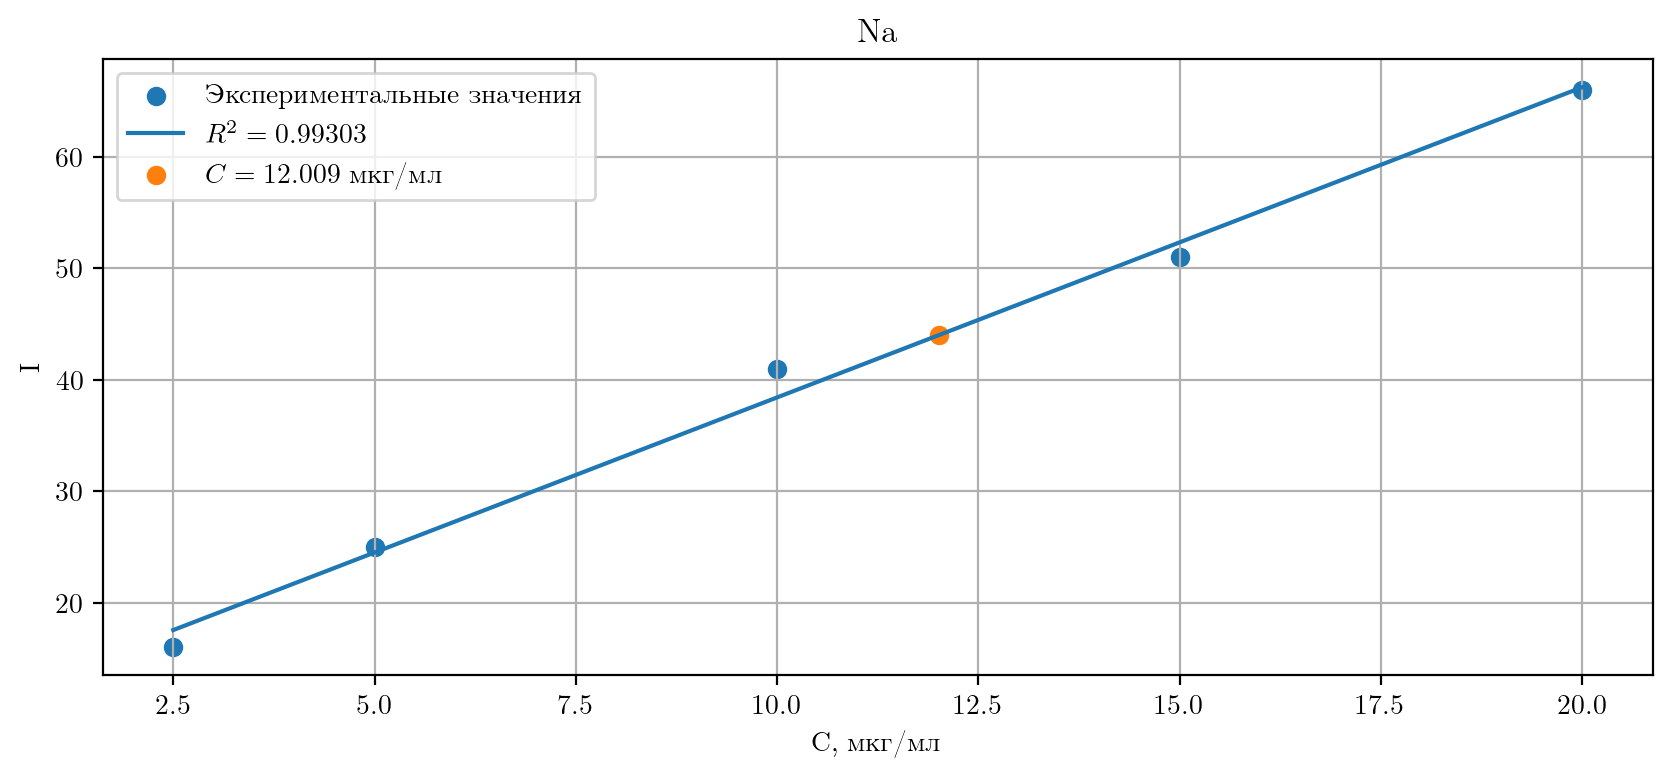

In [3]:
x = df.C_Na
y = df.I_Na
name = "Na"

r2 = calculate_r2(x,y)
popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

plt.figure(figsize=(10,4), dpi =200)

plt.scatter(x,y, label = "Экспериментальные значения")

x1 = np.linspace(np.min(x), np.max(x), 10)
y1 = popt[0] * x1 + popt[1]
plt.plot(x1,y1, label = f"$R^{{2}} = {r2:.5f}$")

y2 = I_Na
x2 = (y2 - popt[1])/popt[0]
plt.scatter(x2,y2, label =f"$C = {x2:.3f}$ мкг/мл")

plt.xlabel("C, мкг/мл")
plt.ylabel("I")
plt.title(name)
plt.grid()
plt.legend()
plt.savefig(f"{name}.png")
plt.show()

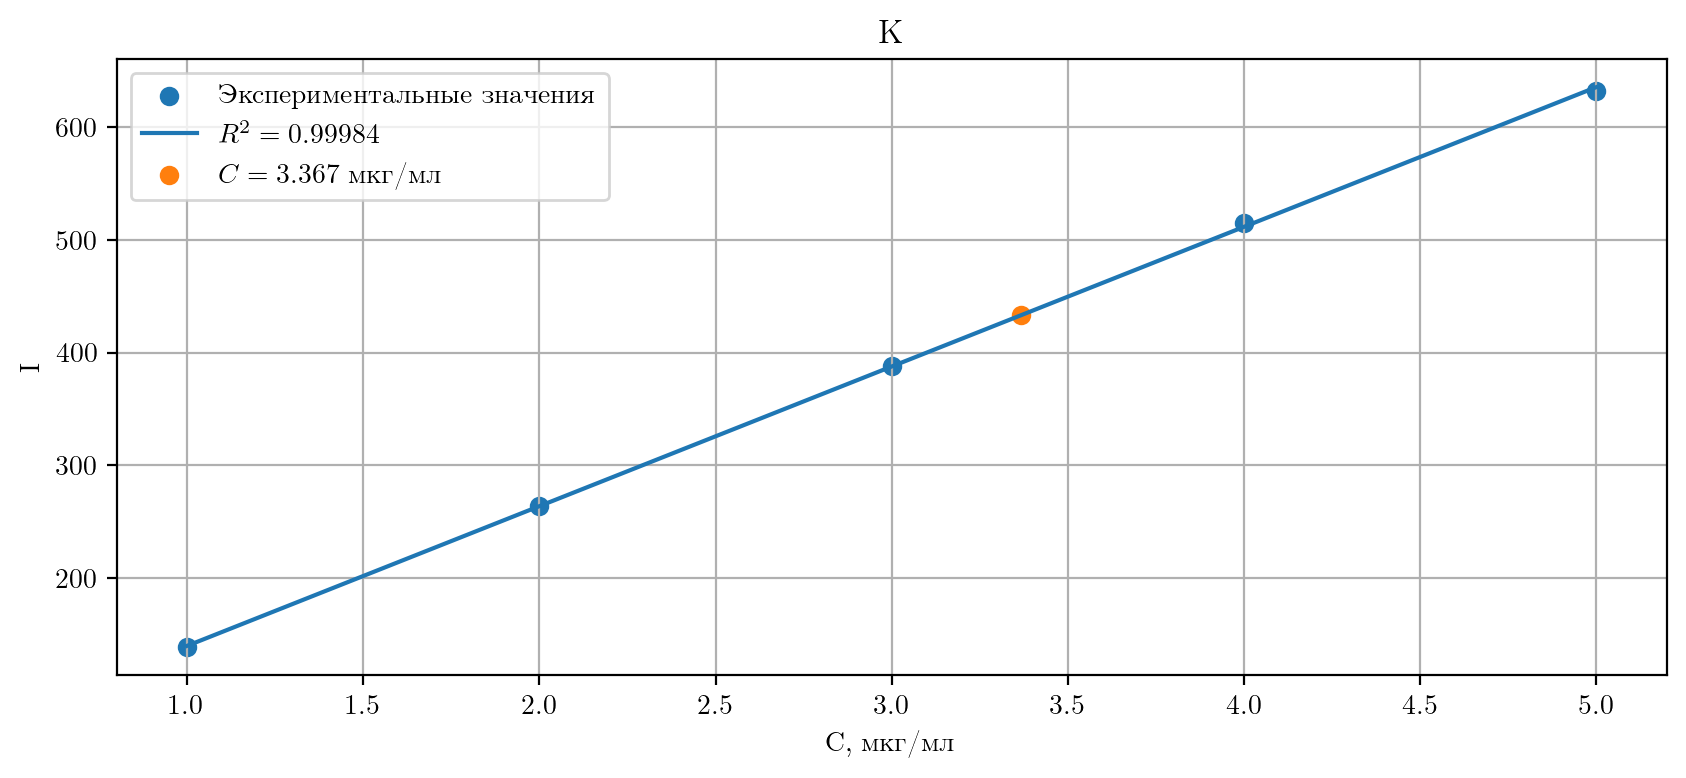

In [7]:
x = df.C_K
y = df.I_K
name = "K"

r2 = calculate_r2(x,y)
popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

plt.figure(figsize=(10,4), dpi =200)

plt.scatter(x,y, label = "Экспериментальные значения")

x1 = np.linspace(np.min(x), np.max(x), 10)
y1 = popt[0] * x1 + popt[1]
plt.plot(x1,y1, label = f"$R^{{2}} = {r2:.5f}$")

y2 = I_K
x2 = (y2 - popt[1])/popt[0]
plt.scatter(x2,y2, label =f"$C = {x2:.3f}$ мкг/мл")

plt.xlabel("C, мкг/мл")
plt.ylabel("I")
plt.title(name)
plt.grid()
plt.legend()
plt.savefig(f"{name}.png")
plt.show()

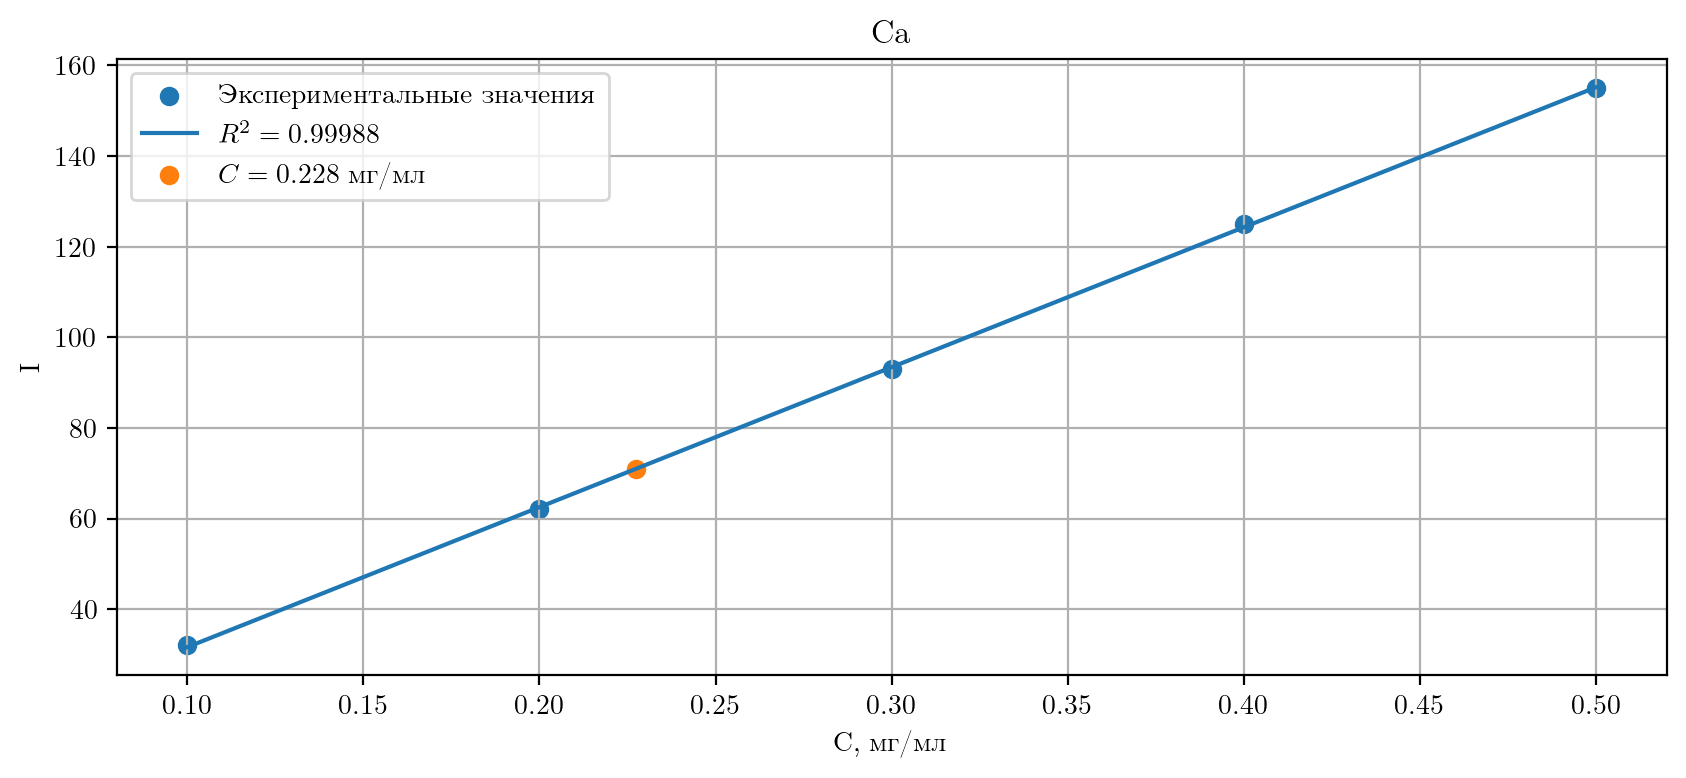

In [6]:
x = df.C_Ca
y = df.I_Ca
name = "Ca"

r2 = calculate_r2(x,y)
popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

plt.figure(figsize=(10,4), dpi =200)

plt.scatter(x,y, label = "Экспериментальные значения")

x1 = np.linspace(np.min(x), np.max(x), 10)
y1 = popt[0] * x1 + popt[1]
plt.plot(x1,y1, label = f"$R^{{2}} = {r2:.5f}$")

y2 = I_Ca
x2 = (y2 - popt[1])/popt[0]
plt.scatter(x2,y2, label =f"$C = {x2:.3f}$ мг/мл")

plt.xlabel("C, мг/мл")
plt.ylabel("I")
plt.title(name)
plt.grid()
plt.legend()
plt.savefig(f"{name}.png")
plt.show()